In [ ]:
import tensorflow as tf
from keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import os
import PIL
from PIL import Image

In [ ]:
from google.colab import drive

file_name = drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name = "/content/drive"

In [ ]:
DATADIR="/content/drive/MyDrive/Brain"

In [ ]:
# Categories for brain tumor detection
CATEGORIES = ["Glioma", "Meningioma", "NoTumor", "Pituitary"]

In [ ]:
import pathlib
data_dir = pathlib.Path(DATADIR)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2812


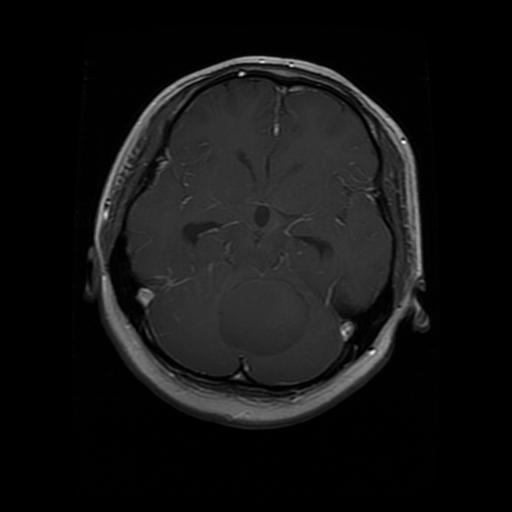

In [ ]:
Glioma = list(data_dir.glob('Glioma/*'))
PIL.Image.open(str(Glioma[0]))

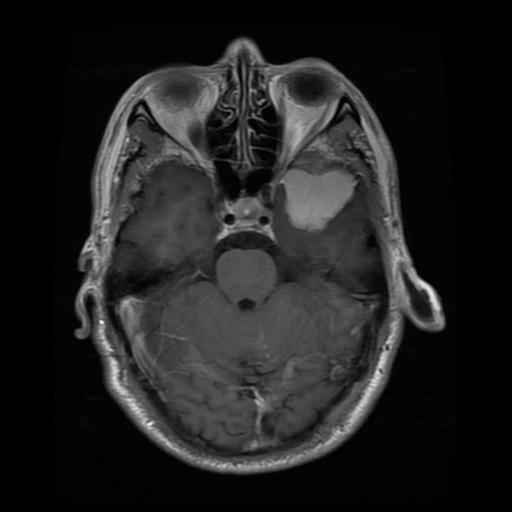

In [ ]:
Meningioma = list(data_dir.glob('Meningioma/*'))
PIL.Image.open(str(Meningioma[0]))

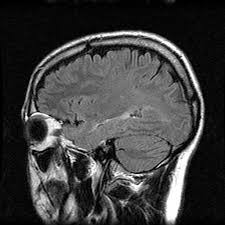

In [ ]:
NoTumor = list(data_dir.glob('NoTumor/*'))
PIL.Image.open(str(NoTumor[0]))

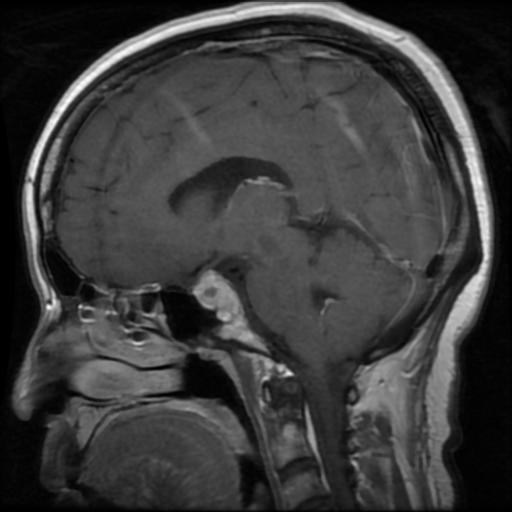

In [ ]:
Pituitary = list(data_dir.glob('Pituitary/*'))
PIL.Image.open(str(Pituitary[0]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2812 files belonging to 4 classes.
Using 2250 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2812 files belonging to 4 classes.
Using 562 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Glioma', 'Meningioma', 'NoTumor', 'Pituitary']


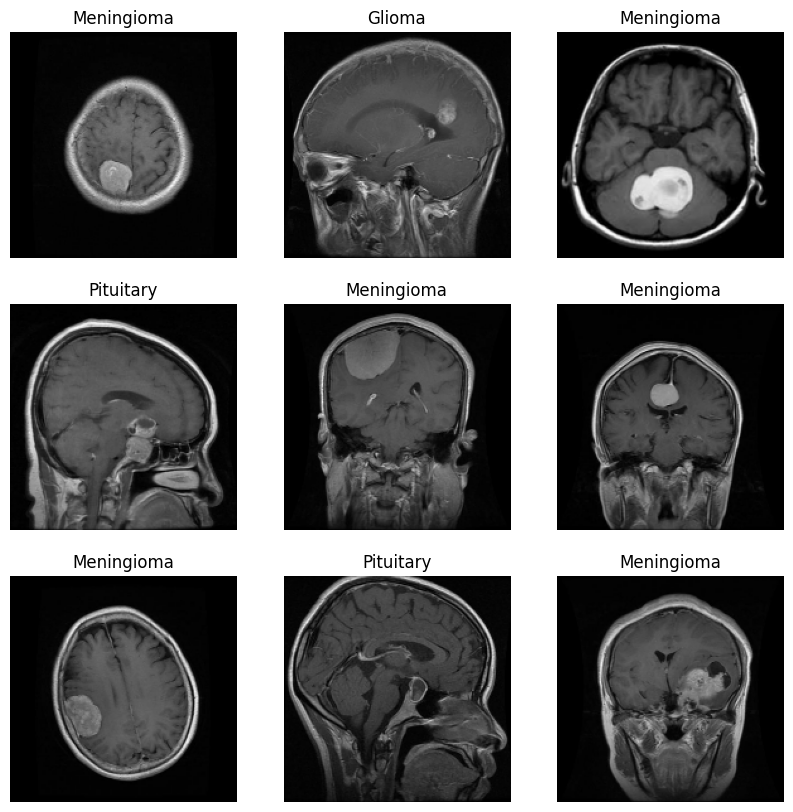

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
      print(image_batch.shape)
      print(labels_batch.shape)
      break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.95739394


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
71/71 [==============================] - 73s 1s/step - loss: 0.8914 - accuracy: 0.6022 - val_loss: 0.6252 - val_accuracy: 0.6886
Epoch 2/50
71/71 [==============================] - 70s 990ms/step - loss: 0.5511 - accuracy: 0.7631 - val_loss: 0.4887 - val_accuracy: 0.7900
Epoch 3/50
71/71 [==============================] - 71s 1s/step - loss: 0.3224 - accuracy: 0.8658 - val_loss: 0.8110 - val_accuracy: 0.7260
Epoch 4/50
71/71 [==============================] - 76s 1s/step - loss: 0.2447 - accuracy: 0.9053 - val_loss: 0.3265 - val_accuracy: 0.8683
Epoch 5/50
71/71 [==============================] - 73s 1s/step - loss: 0.1205 - accuracy: 0.9582 - val_loss: 0.2574 - val_accuracy: 0.9146
Epoch 6/50
71/71 [==============================] - 72s 1s/step - loss: 0.0840 - accuracy: 0.9711 - val_loss: 0.3162 - val_accuracy: 0.8897
Epoch 7/50
71/71 [==============================] - 70s 991ms/step - loss: 0.0459 - accuracy: 0.9853 - val_loss: 0.2710 - val_accuracy: 0.9093
Epoch 8/50
71/

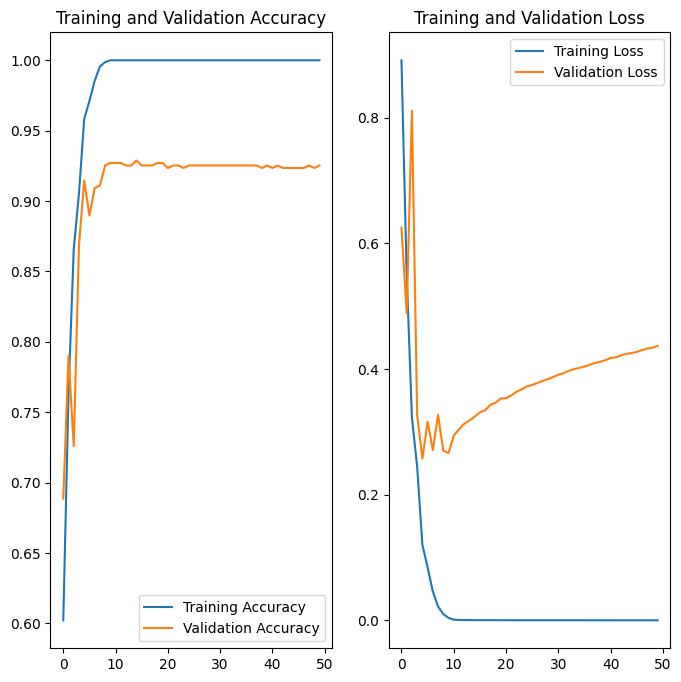

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

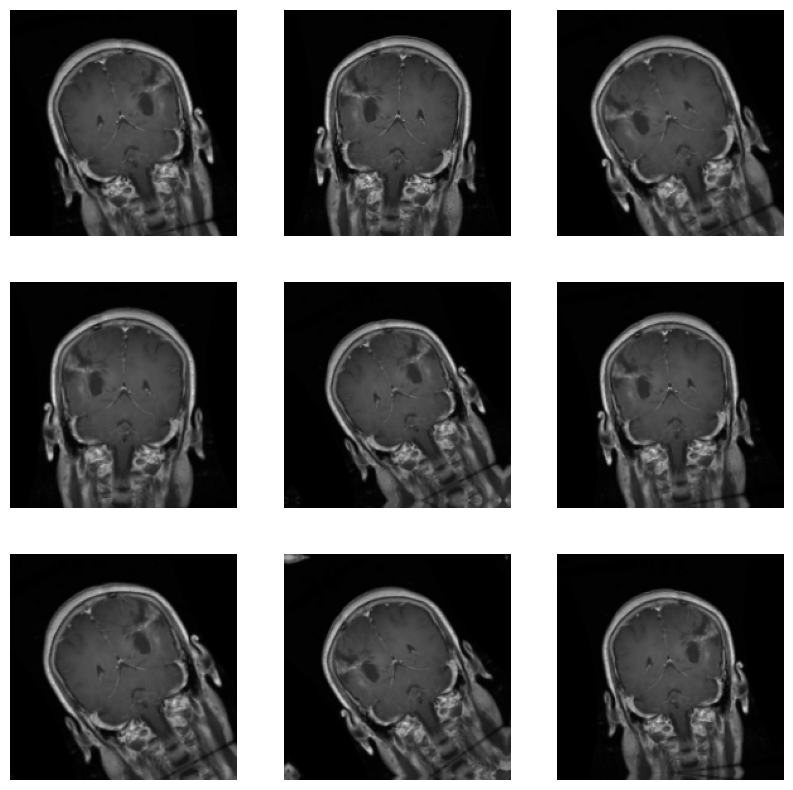

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

In [50]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
71/71 [==============================] - 89s 1s/step - loss: 0.9440 - accuracy: 0.5756 - val_loss: 0.7620 - val_accuracy: 0.6103
Epoch 2/100
71/71 [==============================] - 85s 1s/step - loss: 0.7805 - accuracy: 0.6587 - val_loss: 0.7041 - val_accuracy: 0.6459
Epoch 3/100
71/71 [==============================] - 86s 1s/step - loss: 0.6932 - accuracy: 0.6822 - val_loss: 0.5767 - val_accuracy: 0.7527
Epoch 4/100
71/71 [==============================] - 86s 1s/step - loss: 0.6316 - accuracy: 0.7116 - val_loss: 0.5527 - val_accuracy: 0.7384
Epoch 5/100
71/71 [==============================] - 84s 1s/step - loss: 0.5929 - accuracy: 0.7378 - val_loss: 0.6187 - val_accuracy: 0.7082
Epoch 6/100
71/71 [==============================] - 84s 1s/step - loss: 0.5578 - accuracy: 0.7498 - val_loss: 0.5214 - val_accuracy: 0.7651
Epoch 7/100
71/71 [==============================] - 84s 1s/step - loss: 0.5064 - accuracy: 0.7787 - val_loss: 0.4464 - val_accuracy: 0.8149
Epoch 8/100
7

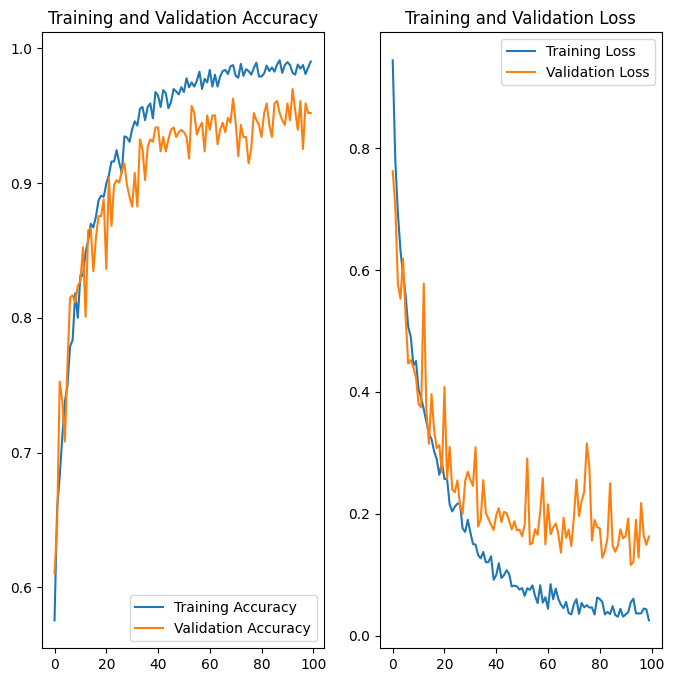

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [74]:
DATADIR = "/content/drive/MyDrive/brain_test_imgs/Tr-gl_1141.jpg"

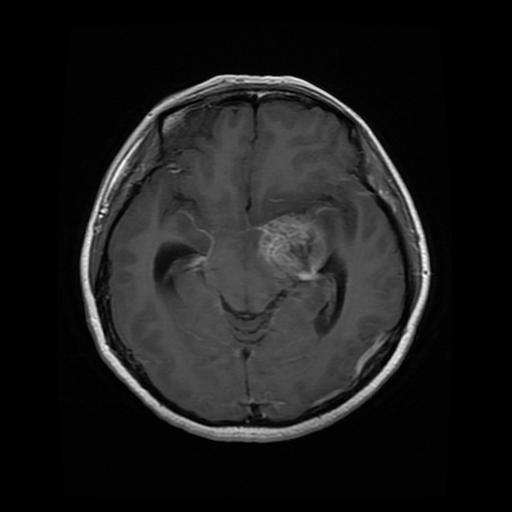

In [75]:
PIL.Image.open(DATADIR)

In [76]:
# DATADIR = "/content/drive/MyDrive/brain_test_imgs/Tr-gl_1141.jpg"
# DATADIR = "/content/drive/MyDrive/brain_test_imgs/Tr-meTr_0007.jpg"
# DATADIR = "/content/drive/MyDrive/brain_test_imgs/Tr-me_0091.jpg"
# DATADIR = "/content/drive/MyDrive/brain_test_imgs/Tr-noTr_0008.jpg"
# DATADIR = "/content/drive/MyDrive/brain_test_imgs/Tr-no_1537.jpg"
# DATADIR ="/content/drive/MyDrive/brain_test_imgs/Tr-piTr_0002.jpg"
# DATADIR ="/content/drive/MyDrive/brain_test_imgs/Tr-pi_1196.jpg"

In [77]:
data_dir = pathlib.Path(DATADIR)

In [78]:
img = tf.keras.utils.load_img(
    data_dir, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 34ms/step
This image most likely belongs to Glioma with a 100.00 percent confidence.


In [79]:
DATADIR = "/content/drive/MyDrive/brain_test_imgs/Tr-meTr_0007.jpg"

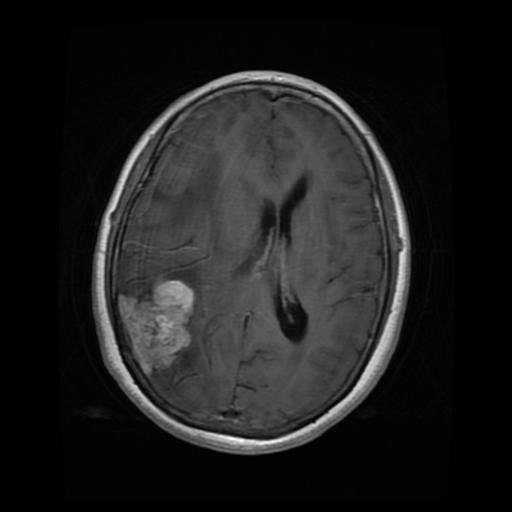

In [80]:
PIL.Image.open(DATADIR)

In [81]:
data_dir = pathlib.Path(DATADIR)

In [82]:

img = tf.keras.utils.load_img(
    data_dir, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 30ms/step
This image most likely belongs to Meningioma with a 99.57 percent confidence.


In [83]:
DATADIR = "/content/drive/MyDrive/brain_test_imgs/Tr-noTr_0008.jpg"

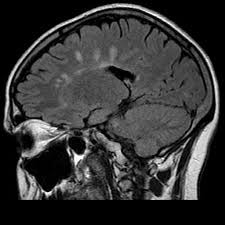

In [86]:
PIL.Image.open(DATADIR)

In [87]:
data_dir = pathlib.Path(DATADIR)

In [88]:
img = tf.keras.utils.load_img(
    data_dir, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 30ms/step
This image most likely belongs to NoTumor with a 93.75 percent confidence.


In [89]:
DATADIR = "/content/drive/MyDrive/brain_test_imgs/Tr-pi_1196.jpg"

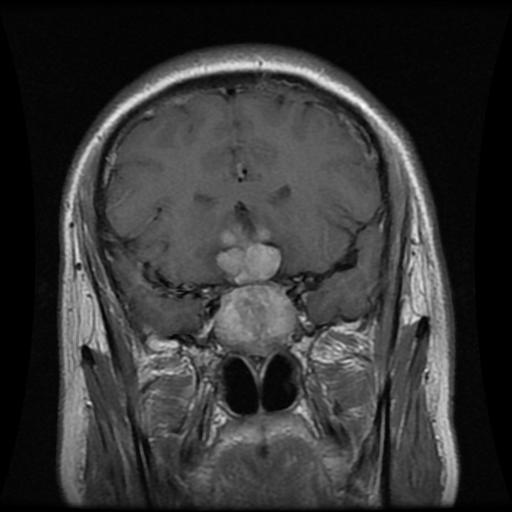

In [90]:
PIL.Image.open(DATADIR)

In [91]:
data_dir = pathlib.Path(DATADIR)

In [92]:
img = tf.keras.utils.load_img(
    data_dir, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 33ms/step
This image most likely belongs to Pituitary with a 99.83 percent confidence.
